# MLS Case Study: Amazon Fine Food Reviews


## **Context:**

- This dataset consists of reviews of fine foods from amazon.
- The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include a plain text review.
- It also includes reviews from all other Amazon categories.

#### The purpose of this analysis is to make up a prediction model where we will be able to predict whether a recommendation is positive or negative. In this analysis, we will focus the positive/negative sentiment of the recommendation.



In [3]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

     |████████████████████████████████| 266kB 13.2MB/s 
     |████████████████████████████████| 327kB 26.2MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85392 sha256=fd8aabea6e19251e0af78640e800361db07bdb625bff1fb0d3857bdaac99a812
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading data into pandas dataframe
data = pd.read_csv("/content/drive/My Drive/GL_Mentor/Data/Reviews.csv")

In [5]:
data.shape                                               # print shape of data.

(568454, 10)

In [6]:
data.head()                                              # Print first 5 rows of data.

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
# Taking only 50000 entries for demonstration purpose. As full data will take more time to process.
# Only keeping score and Text columns from the data, as these are useful for our analysis.

data = data.loc[:99999, ['Score', 'Text']]

In [8]:
data.isnull().sum(axis=0)                                # Check for NULL values.

Score    0
Text     0
dtype: int64

In [9]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

,Score,Text
0,5,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,4,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,2,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [31]:
data.shape                                # Shape of data

(100000, 2)

### Data Pre-processing:

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data

We have used NLTK library to tokenize words , remove stopwords and lemmatize the remaining words.

In [10]:
data["Text"][data["Text"].str.contains("http")].head()
# Look for http tags then clean up

21                                                                                                                                                                                                                                                                  I bought these for my husband who is currently overseas. He loves these, and apparently his staff likes them also.<br />There are generous amounts of Twizzlers in each 16-ounce bag, and this was well worth the price. <a href="http://www.amazon.com/gp/product/B001GVISJM">Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6)</a>
25                                                                                                                                                                                                                                                                                                                                                                                                                              

In [13]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['Text'] = data['Text'].apply(lambda x: strip_html(x))
data.head()
# remove html to get text, very useful for web scrapping , quality assurance in diff problems, 

,Score,Text
0,5,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,4,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,2,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [14]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['Text'] = data['Text'].apply(lambda x: replace_contractions(x))
data.head()

,Score,Text
0,5,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,4,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,2,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [15]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['Text'] = data['Text'].apply(lambda x: remove_numbers(x))
data.head()

# Why remove numbers here - based on problem statement as numbers arent useful for Sentiment Analysis

,Score,Text
0,5,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,4,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,2,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [16]:
data['Text'] = data.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1) # Tokenization of data

In [17]:
data.head()                                                                    # Look at how tokenized data looks.

,Score,Text
0,5,"[I, have, bought, several, of, the, Vitality, canned, dog, food, products, and, have, found, them, all, to, be, of, good, quality, ., The, product, looks, more, like, a, stew, than, a, processed, meat, and, it, smells, better, ., My, Labrador, is, finicky, and, she, appreciates, this, product, better, than, most, .]"
1,1,"[Product, arrived, labeled, as, Jumbo, Salted, Peanuts, ..., the, peanuts, were, actually, small, sized, unsalted, ., Not, sure, if, this, was, an, error, or, if, the, vendor, intended, to, represent, the, product, as, ``, Jumbo, '', .]"
2,4,"[This, is, a, confection, that, has, been, around, a, few, centuries, ., It, is, a, light, ,, pillowy, citrus, gelatin, with, nuts, -, in, this, case, Filberts, ., And, it, is, cut, into, tiny, squares, and, then, liberally, coated, with, powdered, sugar, ., And, it, is, a, tiny, mouthful, of, heaven, ., Not, too, chewy, ,, and, very, flavorful, ., I, highly, recommend, this, yummy, treat, ., If, you, are, familiar, with, the, story, of, C.S, ., Lewis, ', ``, The, Lion, ,, The, Witch, ,, and, The, Wardrobe, '', -, this, is, the, treat, that, seduces, Edmund, into, selling, ...]"
3,2,"[If, you, are, looking, for, the, secret, ingredient, in, Robitussin, I, believe, I, have, found, it, ., I, got, this, in, addition, to, the, Root, Beer, Extract, I, ordered, (, which, was, good, ), and, made, some, cherry, soda, ., The, flavor, is, very, medicinal, .]"
4,5,"[Great, taffy, at, a, great, price, ., There, was, a, wide, assortment, of, yummy, taffy, ., Delivery, was, very, quick, ., If, your, a, taffy, lover, ,, this, is, a, deal, .]"


In [18]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))           
# Extra stop words beyond nltk that we want to leverage, Use set operations to reduce stop words -> or add as well.                    

In [19]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['Text'] = data.apply(lambda row: normalize(row['Text']), axis=1)
data.head()

# Apply all steps together on the dataset and joined words again for count and tf idf vectorizer expect document together; 

,Score,Text
0,5,buy several vitality can dog food products find good quality product look like stew process meat smell better labrador finicky appreciate product better
1,1,product arrive label jumbo salt peanuts peanuts actually small size unsalted not sure error vendor intend represent product jumbo
2,4,confection around centuries light pillowy citrus gelatin nut case filberts cut tiny square liberally coat powder sugar tiny mouthful heaven not chewy flavorful highly recommend yummy treat familiar story cs lewis lion witch wardrobe treat seduce edmund sell brother sisters witch
3,2,look secret ingredient robitussin believe find get addition root beer extract order good make cherry soda flavor medicinal
4,5,great taffy great price wide assortment yummy taffy delivery quick taffy lover deal


In [20]:
data.shape
labels = data['Score']
labels = labels.astype('int')

In [21]:
data_features_text = np.array(data["Text"])                        # Convert the data features to array.

In [166]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features_text, labels, test_size=0.2, random_state=42,stratify=labels)

In [167]:
y_train.value_counts()
# Data is more skewed towards positive labels

5    49930
4    11714
1     7455
3     6447
2     4454
Name: Score, dtype: int64

In [168]:
y_test.value_counts()

5    12482
4     2929
1     1863
3     1612
2     1114
Name: Score, dtype: int64

In [169]:
print(X_train.shape)
print(y_train.shape)

(80000,)
(80000,)


In [171]:
print(X_train[9])
print(y_train[9])

lupo cortese restaurant peoplethese guy correct make spiedies lupo marinade thing remember lupo always crowd didnttake long country boy get addict chicken pork spiediesi try duplicate stuff give try use state fairmarinade reasonable substitute sauce lupo magicdoes spiedie chiavetta grill chicken pork awesome
5


In [172]:
print(X_test.shape)
print(y_test.shape)

(20000,)
(20000,)


In [173]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
X_train_vec = vectorizer.fit_transform(X_train)

#Qn - MAX FEATURES?
# Can i do here vectorizer.fit_transform(data_features_text)

In [174]:
vectorizer.get_feature_names()[:20]

['able',
 'absolutely',
 'acid',
 'across',
 'actual',
 'actually',
 'add',
 'addict',
 'addition',
 'admit',
 'adult',
 'advertise',
 'afternoon',
 'aftertaste',
 'age',
 'ago',
 'agree',
 'air',
 'allergies',
 'allow']

In [175]:
X_train[5]

'vegetarian love gummi candy ecstatic see vegetarian gummi bear available arrive yesterday immediately rip open bagthey good texture not quite gummi bear animalbased gelatin something chewiness not quite right could easily slice dull side knife regular gummi hand would require stroke serrate blade consistency however good not hard soft flavor even better many brand regular gummi bearsoverall definitely best vegetarian alternative traditional gummi candy find much better ones bulk bin whole foods'

In [176]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train_vec, y_train)

print(forest)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


In [177]:
print(np.mean(cross_val_score(forest, X_train_vec, y_train, cv=10)))

0.6957875


In [178]:
# Predict the result for test data using the model built above.
X_test_vec = vectorizer.fit_transform(X_test)
result = forest.predict(X_test_vec)

[[ 382   34   57  205 1185]
 [ 224   24   50  146  670]
 [ 329   41   72  242  928]
 [ 441   42  118  425 1903]
 [1817  170  314 1145 9036]]


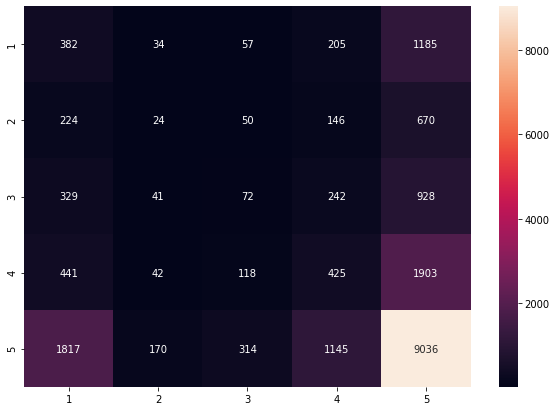

In [179]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [180]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(max_features=2000, ngram_range=(1, 2))
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)


In [182]:
vectorizer_tfidf.get_feature_names()[:20]

['able',
 'able find',
 'absolute',
 'absolutely',
 'absolutely love',
 'accord',
 'acid',
 'acidic',
 'across',
 'actual',
 'actually',
 'actually taste',
 'add',
 'add little',
 'add sugar',
 'add water',
 'addict',
 'addictive',
 'addition',
 'additional']

In [183]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train_tfidf, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X_train_tfidf, y_train, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7058625


In [184]:
X_test_tfidf = vectorizer_tfidf.fit_transform(X_test)
result = forest.predict(X_test_tfidf)

In [189]:
print('Accuracy on Test Data Set',sum(result == y_test) / len(y_test))

Accuracy on Test Data Set 0.5394


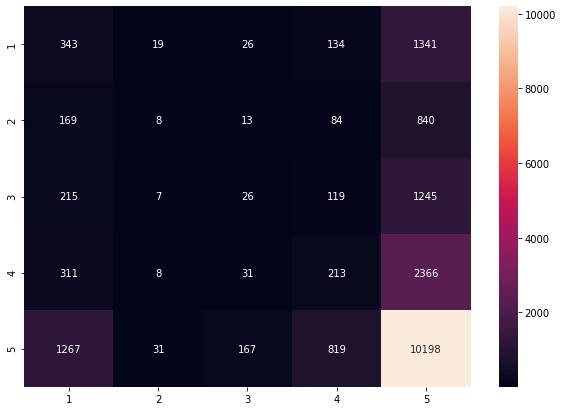

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')
# Model performs best at 5s and worst at 0s - error analysis to see why negative sentiment words arent being picked up


Summary:

- We used dataset which has reviews in text format and their sentiment score on the scale of 1 to 5.
- The goal was to build a model for text-classification.
- We Pre-processed the data using variuos techniques and libraries.
- The pre-precessed data is converted to numbers, so that we can feed the data in the model.
- After building the classification model, we predicted the result for the test data.
- After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
- However, we can still increase the accuracy of our model by increasing the dataset we took into account for the model building (As the time was constraint here so we only used 50000 entries out of around 500000 entries, which means we built our model using 10% of dataset.)
- One more way to increase accuracy is to use different variations of Pre-processing techniques.

In [ ]:
## What try after this 
# Better Word vectors   3
# Error analysis and better data preprocessing   1  
# Better models  2


# Deep Neural Network

In [190]:
# Deep Neural Network with Word Embeddings layer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [191]:
#Split Training and Test data - performed before

In [195]:
length = 0
for i in range(0,len(X_train)):
  length = length + len(X_train[i])
print('Avg Length of Sequences',length/X_train.shape[0])

Avg Length of Sequences 257.5393125


In [196]:
embedding_dim = 16
max_length = 300
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = 50000,oov_token=oov_tok)  # Keras Tokenizer
tokenizer.fit_on_texts(X_train)

vocab_size = len(tokenizer.word_index) + 1

word_index = tokenizer.word_index
X_train_tokenize = tokenizer.texts_to_sequences(X_train)
padded = pad_sequences(X_train_tokenize,maxlen=max_length,truncating=trunc_type, padding='post')

X_test_tokenize = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(X_test_tokenize,maxlen=max_length,truncating=trunc_type, padding='post')

In [202]:
#Vocab size
len(tokenizer.word_index) + 1

76375

In [198]:
#Padded sequence used as input to Keras Model
print(X_train[2])
print(X_train_tokenize[2])
print(padded[2])

enjoy taste tai peanut noodles rock peanutty flavor mmm decide try um ginger not much nothing really distinguish noodle flavor ginger bite overpoweringtake review stride though ginger lover not talk gilligan island may right alley bite outside though may mix metaphors
[72, 4, 13237, 243, 342, 1252, 5681, 5, 4124, 242, 12, 5569, 256, 2, 26, 233, 24, 4215, 1033, 5, 256, 56, 31296, 88, 9440, 121, 256, 988, 2, 972, 8969, 2318, 157, 96, 6063, 56, 851, 121, 157, 50, 31297]
[   72     4 13237   243   342  1252  5681     5  4124   242    12  5569
   256     2    26   233    24  4215  1033     5   256    56 31296    88
  9440   121   256   988     2   972  8969  2318   157    96  6063    56
   851   121   157    50 31297     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     

In [199]:
for word in ['cat', 'care', 'happy', 'sad']:
    print('{}: {}'.format(word, tokenizer.word_index[word]))

cat: 63
care: 384
happy: 151
sad: 1587


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, 300, 16)           1222000   
_________________________________________________________________
global_max_pooling1d_11 (Glo (None, 16)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_47 (Dense)             (None, 6)                 78        
Total params: 1,222,282
Trainable params: 1,222,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/8
2500/2500 [==============================] - 24s 9ms/step - loss: 1.1660 - accuracy: 0.6072 - val_loss: 0.8966 - val_accuracy: 0.6682
Epoch 2/8
2500/2500 [==============================] - 23s 9ms/step - loss: 0.8632 - accuracy: 0.

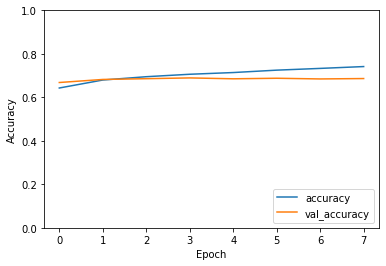

In [203]:
#First Model - Word Embedding Vector with Dense Layers
embedding_dim = 16
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length = max_length),
                             tf.keras.layers.GlobalMaxPool1D(),
                             tf.keras.layers.Dense(12,activation='relu'),
                             tf.keras.layers.Dense(6,activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 8
history = model.fit(padded,y_train,epochs = num_epochs,validation_data=(testing_padded,y_test))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right');

In [206]:
# Each word in Vocab with embedding vector
e =model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) #shape:(vocab_size,embedding_dim)

(76375, 16)


In [207]:
#Vector of 16 for each word
weights[0]

array([ 0.45196706, -0.14275515, -0.15789297, -0.15244631, -0.15752545,
       -0.14327328, -0.20716304,  0.07475207, -0.13036925, -0.14821813,
       -0.24239212,  0.15213083, -0.29318622, -0.11901312, -0.22929327,
       -0.24422161], dtype=float32)

In [208]:
## Model using Pretrained Embedding Weights - Glove Method

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [209]:
filepath = "/content/drive/My Drive/GL_Mentor/Data/glove.6B/glove.6B.300d.txt"
embedding_matrix = create_embedding_matrix(filepath,tokenizer.word_index, embedding_dim)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_26 (Embedding)     (None, 300, 16)           1222000   
_________________________________________________________________
global_max_pooling1d_12 (Glo (None, 16)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_49 (Dense)             (None, 6)                 78        
Total params: 1,222,282
Trainable params: 1,222,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2500/2500 [==============================] - 23s 9ms/step - loss: 1.2256 - accuracy: 0.5731 - val_loss: 0.9728 - val_accuracy: 0.6532
Epoch 2/10
2500/2500 [==============================] - 23s 9ms/step - loss: 0.9349 - accuracy: 

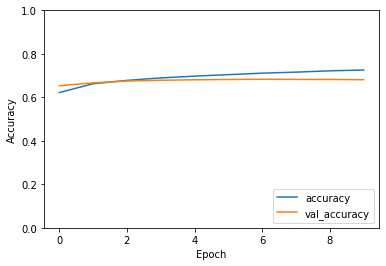

In [212]:
#Model 2 - Keras model with pretrained embedding vectors
#The glove file can be obtained at https://github.com/stanfordnlp/GloVe
embedding_dim = 16
model_glove = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,weights=[embedding_matrix],input_length = max_length),
                             tf.keras.layers.GlobalMaxPool1D(),
                             tf.keras.layers.Dense(12,activation='relu'),
                             tf.keras.layers.Dense(6,activation='softmax')
])
model_glove.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_glove.summary()

num_epochs = 10
history_glove = model_glove.fit(padded,y_train,epochs = num_epochs,validation_data=(testing_padded,y_test))

plt.plot(history_glove.history['accuracy'], label='accuracy')
plt.plot(history_glove.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right');

In [213]:
#Lof of word vectors in current Vocab not in Glove Pretrained vector list
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements / vocab_size)

0.35948936170212764


Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 300, 16)           1222000   
_________________________________________________________________
lstm_11 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dense_50 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_51 (Dense)             (None, 6)                 78        
Total params: 1,224,394
Trainable params: 1,224,394
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2500/2500 [==============================] - 51s 20ms/step - loss: 1.2273 - accuracy: 0.6119 - val_loss: 1.1613 - val_accuracy: 0.6245
Epoch 2/10
2500/2500 [==============================] - 50s 20ms/step - loss: 1.1613 - accuracy

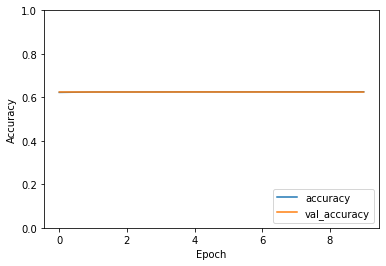

In [214]:
#Model using LSTM - No performance model using LSTM and other similar models
model_lstm = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length = max_length),
                             tf.keras.layers.LSTM(16),
                             tf.keras.layers.Dense(12,activation='relu'),
                             tf.keras.layers.Dense(6,activation='softmax')
])
model_lstm.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_lstm.summary()

num_epochs = 10
history_lstm = model_lstm.fit(padded,y_train,epochs = num_epochs,validation_data=(testing_padded,y_test))

plt.plot(history_lstm.history['accuracy'], label='accuracy')
plt.plot(history_lstm.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right');

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 500, 16)           1221584   
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense_38 (Dense)             (None, 12)                780       
_________________________________________________________________
dense_39 (Dense)             (None, 6)                 78        
Total params: 1,234,986
Trainable params: 1,234,986
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
2500/2500 [==============================] - 60s 24ms/step - loss: 1.1609 - accuracy: 0.6241 - val_loss: 1.1626 - val_accuracy: 0.6231
Epoch 2/12
2500/2500 [==============================] - 59s 24ms/step - loss: 1.1604 - accuracy

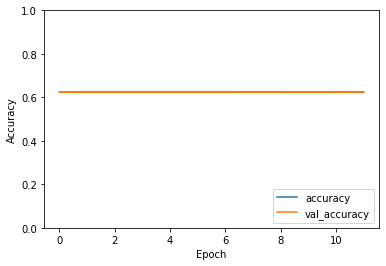

In [135]:
#Model using Bidirectional LSTM 
model_bilstm = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length = max_length),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(12,activation='relu'),
                             tf.keras.layers.Dense(6,activation='softmax')
])
model_bilstm.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_bilstm.summary()
num_epochs = 12
history_bilstm = model_lstm.fit(padded,y_train,epochs = num_epochs,validation_data=(testing_padded,y_test))

plt.plot(history_bilstm.history['accuracy'], label='accuracy')
plt.plot(history_bilstm.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right');

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 300, 16)           1222000   
_________________________________________________________________
conv1d (Conv1D)              (None, 295, 20)           1940      
_________________________________________________________________
lstm_12 (LSTM)               (None, 16)                2368      
_________________________________________________________________
dense_52 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_53 (Dense)             (None, 6)                 78        
Total params: 1,226,590
Trainable params: 1,226,590
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2500/2500 [==============================] - 51s 20ms/step - loss: 1.2039 - accuracy: 0.6246 - val

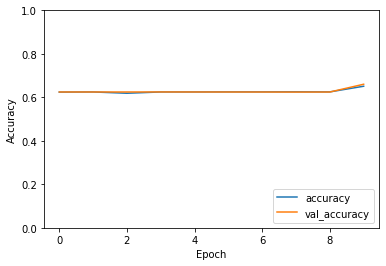

In [215]:
#Model using Conv1D & LSTM
model_conv1d_lstm = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length = max_length),
                             tf.keras.layers.Conv1D(20, 6, activation='relu'), # 20 filters
                             tf.keras.layers.LSTM(16),
                             tf.keras.layers.Dense(12,activation='relu'),
                             tf.keras.layers.Dense(6,activation='softmax')
])
model_conv1d_lstm.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_conv1d_lstm.summary()

num_epochs = 10
history_conv1d_lstm = model_conv1d_lstm.fit(padded,y_train,epochs = num_epochs,validation_data=(testing_padded,y_test))

plt.plot(history_conv1d_lstm.history['accuracy'], label='accuracy')
plt.plot(history_conv1d_lstm.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right');

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 500, 16)           1221584   
_________________________________________________________________
lstm_9 (LSTM)                (None, 500, 32)           6272      
_________________________________________________________________
lstm_10 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dense_42 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_43 (Dense)             (None, 6)                 78        
Total params: 1,231,274
Trainable params: 1,231,274
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2500/2500 [==============================] - 102s 40ms/step - loss: 1.2105 - accuracy: 0.6164 - va

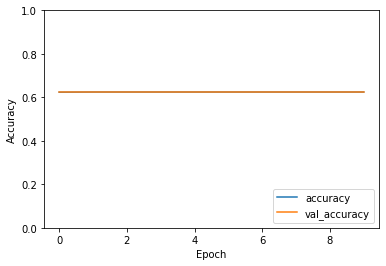

In [137]:
#Model using Deep LSTM - 2 LSTM layers
model_deeplstm = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length = max_length),
                             tf.keras.layers.LSTM(32,return_sequences=True),
                             tf.keras.layers.LSTM(16),
                             tf.keras.layers.Dense(12,activation='relu'),
                             tf.keras.layers.Dense(6,activation='softmax')
])
model_deeplstm.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_deeplstm.summary()

num_epochs = 10
history_deeplstm = model_deeplstm.fit(padded,y_train,epochs = num_epochs,validation_data=(testing_padded,y_test))

plt.plot(history_deeplstm.history['accuracy'], label='accuracy')
plt.plot(history_deeplstm.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right');